### Compare several t-SNE plots

In [24]:
import numpy as np
import os
import json
import matplotlib.pyplot as plt
from matplotlib import cm

In [25]:
# increase matplotlib font size
plt.rcParams.update({'font.size': 16})

In [26]:
analysis_dir = "../../../logs/de/analysis/version_1"
branches = [0, 16]
ylim = [-40, 40]
xlim = [-40, 40]

In [27]:
# load the numpy data for the given branches and the labels
data = dict()
for branch in branches:
    data[branch] = {
        "vecs": np.load(os.path.join(analysis_dir, f"tsne/b{branch}/vecs.npy")),
        "labels": np.load(os.path.join(analysis_dir, f"tsne/b{branch}/labels.npy")),
    }
labels = json.load(open(os.path.join(analysis_dir, "langs.json")))


In [37]:
labels

['de', 'at', 'ch', 'ca', 'it', 'ru', 'us', 'gb', 'fr', 'de_al', 'de_ni']

In [38]:
# add pretty labels
pretty_labels = [
    "German (std.)",
    "Austrian",
    "Swiss",
    "Canadian",
    "Italian",
    "Russian",
    "American",
    "British",
    "French",
    "Alemannic",
    "Lower Rhine",
]

In [28]:
# ensure that all labels are the same
for branch in branches:
    assert np.all(data[branch]["labels"] == data[branches[0]]["labels"])

In [39]:
# create a function to plot the embeddings
def plot_embeddings(ax, embeddings, emb_labels, labels):
    """Plot the t-SNE embeddings and save them to the given file. Store also
    the cosine and euclidean distances between all pairs of means of the accents."""
    n_accents = len(labels)
    colors = cm.rainbow(np.linspace(0, 1, n_accents))
    avgs = np.zeros((n_accents, 2))
    for i in range(n_accents):
        accent_data = embeddings[np.argwhere(emb_labels == i)].squeeze()
        mean = np.mean(accent_data, axis=0)
        avgs[i] = mean
        ax.scatter(
            accent_data[:, 0],
            accent_data[:, 1],
            color=colors[i],
            alpha=0.2,
        )
        ax.scatter(
            mean[0], mean[1], facecolors=colors[i], edgecolors="black", s=100, label=pretty_labels[i],
        )

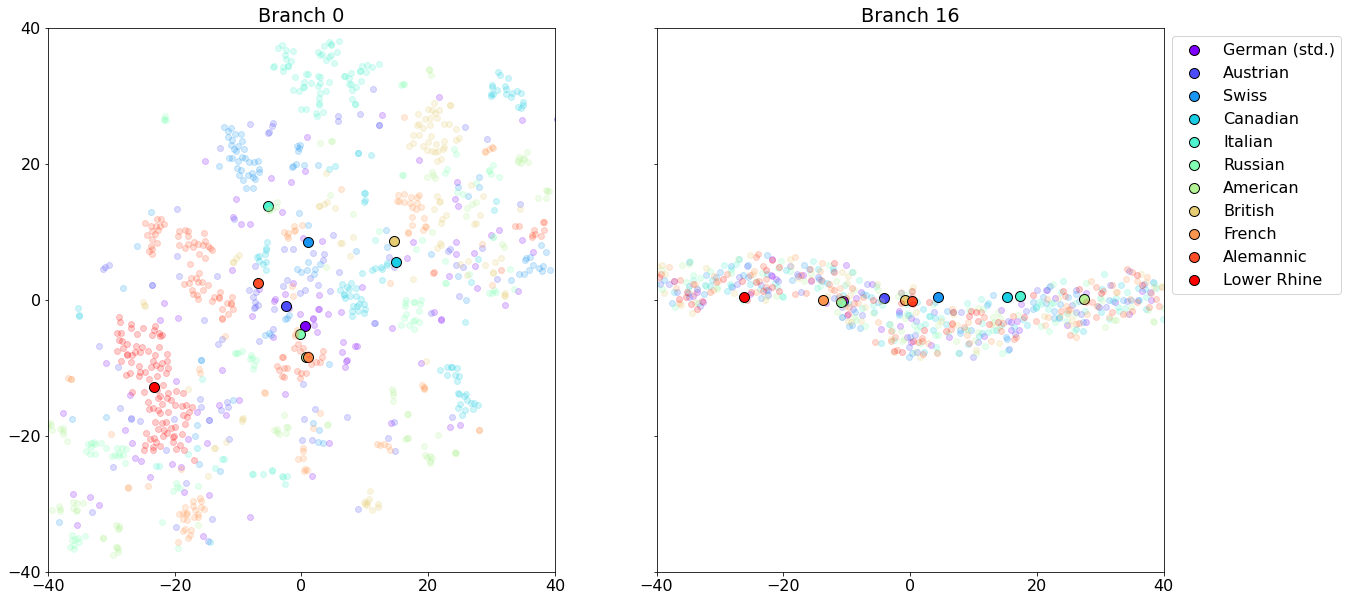

In [40]:
# plot the data
fig, axs = plt.subplots(1, len(branches), figsize=(20, 10), sharey=True)
for i, branch in enumerate(branches):
    axs[i].set_title(f"Branch {branch}")
    plot_embeddings(axs[i], data[branch]["vecs"], data[branch]["labels"], labels)
    axs[i].set_ylim(ylim)
    axs[i].set_xlim(xlim)
    # set the xticks and yticks
    axs[i].set_xticks(np.arange(xlim[0], xlim[1] + 1, 20))
    axs[i].set_yticks(np.arange(ylim[0], ylim[1] + 1, 20))
# add the legend of the last plot
axs[-1].legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

In [41]:
# get the EMD distances between the accents
dists = dict()
for branch in branches:
    dists[branch] = np.load(os.path.join(analysis_dir, f"tsne/b{branch}/emd.npy")),


In [53]:
# print the EMD distances from the standard accent
print(labels)
for branch in dists:
    print(f"Branch {branch}:")
    print(np.round(dists[branch][0][0], 2))

['de', 'at', 'ch', 'ca', 'it', 'ru', 'us', 'gb', 'fr', 'de_al', 'de_ni']
Branch 0:
[ 0.    1.36  6.43 11.85 10.19  6.31  8.73 13.33  4.26  3.69 16.97]
Branch 16:
[ 0.    3.48  7.67 13.16 14.25  2.57 19.04  5.06  3.91  9.01  7.85]
